In [1]:
import numpy as np 
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from displayData import *
from lrCostFunction import *
from oneVsAll import *
from predictOneVsAll import *

In [2]:
data=loadmat('digits.mat')
X=data['X']
y=data['y']
m=X.shape[0]

# Visualize data

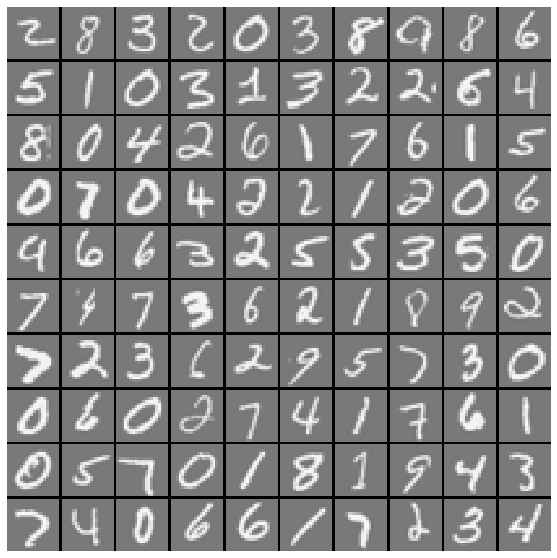

In [3]:
# Randomly select 100 data points to display
rand_indices=np.random.randint(m,size=100)
sel=X[rand_indices,:]
displayData(sel,20,20)

# Logistic regression

## Cost & Gradient

In [4]:
# Test case for lrCostFunction
theta_t=np.array([-2,-1,1,2])[:,np.newaxis]
X_t=np.hstack((np.ones((5,1)),np.arange(1,16).reshape(3,5).T/10))
y_t=np.array([1,0,1,0,1])[:,np.newaxis]
Lambda_t=3
J,grad=lrCostFunction(theta_t,X_t,y_t,Lambda_t)
print('Cost: %f'%J)
print('Expected cost: 2.534819')
print('Gradients: \n',grad)
print('Expected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003')

Cost: 2.534819
Expected cost: 2.534819
Gradients: 
 [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


## One-vs-all

### Learning

In [5]:
n_labels=10
Lambda=0.1
all_theta=oneVsAll(X,y,n_labels,Lambda)

### Prediction

In [6]:
pred=predictOneVsAll(all_theta,X)
print('Training Set Accuracy: %f'%(np.mean(pred[:,np.newaxis]==y)*100))

Training Set Accuracy: 93.240000


# Advanced optimization algorithms

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
clf=LogisticRegression(penalty='l2',C=0.001,solver='lbfgs',multi_class='ovr').fit(X_train,np.ravel(y_train))
print('Training set accuracy: %.2f'%(clf.score(X_train,y_train)*100)+'%')
print('Test set accuracy: %.2f'%(clf.score(X_test,y_test)*100)+'%')

Training set accuracy: 79.92%
Test set accuracy: 76.28%


True class: 3  |  Predicted class: 7 | Probability of match: 13.7%


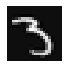

In [8]:
ri=np.random.randint(X_test.shape[0])
Xi=X_test[ri,:][np.newaxis,:]
displayData(Xi,20,20)
print('True class: %d  |  Predicted class: %d | Probability of match: %.1f'%(y_test[ri],clf.predict(Xi),np.max(clf.predict_proba(Xi))*100)+'%')